In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.cluster.vq import kmeans2
from skimage import color

%matplotlib inline

Throwing away the alpha channel...


<matplotlib.colorbar.Colorbar instance at 0x107fb5f80>

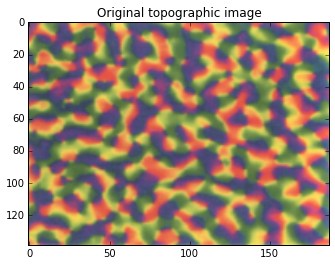

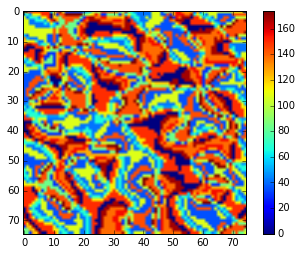

In [3]:
# Orientation preference map: for now, use k-means on Blasdel image
# rgb_img = mpimg.imread('v1-topology-blasdel-figure6.png')
# rgb_img = mpimg.imread('orientation-preference-rubin-figure6.png')
rgb_img = mpimg.imread('orientation-obermayer-fig1.png')

plt.figure()
plt.imshow(rgb_img)
plt.title('Original topographic image')

if rgb_img.shape[2] > 3:
    print "Throwing away the alpha channel..."
    rgb_img = rgb_img[:,:,0:-1]

lab_img = color.rgb2lab(rgb_img) # convert to L*a*b* colourspace

ab = lab_img[:,:,1:]
n_rows = np.shape(ab)[0]
n_cols = np.shape(ab)[1]

ab = np.reshape(ab, (n_rows*n_cols, 2))
n_colours = 30

centroids, labels = kmeans2(ab, n_colours)

labels = np.reshape(labels, (n_rows, n_cols))

rgb_labels = np.tile(labels[:,:,None], [1,1,3])

OP_range = np.linspace(0, 180, n_colours, endpoint=False)
full_OP_map = np.copy(labels)

for i in range(n_colours):
    seg_img = np.copy(rgb_img)
    seg_img[rgb_labels != i] = 0  
    
    # assign an orientation preference (degrees) based on segmentation
    full_OP_map[full_OP_map == i] = OP_range[i]
    
    # Show the individual segmented images:
#     plt.figure()
#     plt.imshow(seg_img)

N_pairs = 75 # no. of E/I pairs to a side of a grid
field_size = 16. # size of field to a side (degrees)
dx = field_size / N_pairs

xy_range = np.linspace(0, field_size, N_pairs, False)
# xy_range = np.linspace(-field_size/2, field_size/2, N_pairs)

xv, yv = np.meshgrid(xy_range, xy_range) # x and y grid values (degrees)

# sample the OP map uniformly 
min_dim = np.min(np.shape(full_OP_map))

# Sampling the map evenly - results in poor continuity - use o
# o_samples = np.round(np.linspace(0, min_dim-1, N_pairs))
# xo, yo = np.meshgrid(o_samples, o_samples)
# xo = xo.astype(int)
# yo = yo.astype(int)

OP_map = full_OP_map[-N_pairs:, -N_pairs:]

# OP_map = OP_map.astype(float)

plt.figure()
plt.imshow(OP_map)
plt.colorbar()

(139, 191, 4)
(75, 75)


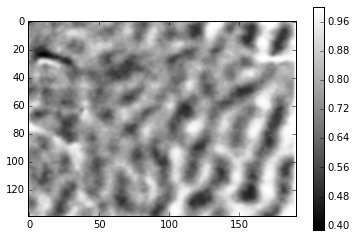

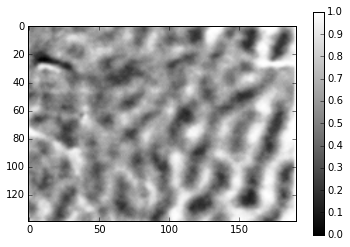

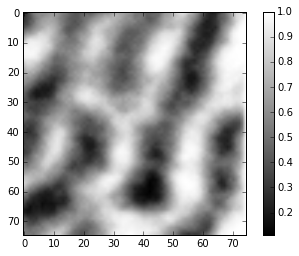

In [4]:
# Ocular dominance map: from Obermayer and Blasdel, 1993
# which contains images of ocular dominance and orientation preference from the same region

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

OD_raw = mpimg.imread('ocular-dom-obermayer-fig1.png')    
print OD_raw.shape
OD_gray = rgb2gray(OD_raw)    
plt.figure()
plt.imshow(OD_gray, cmap = plt.get_cmap('gray'))
plt.colorbar()

OD_norm = (OD_gray - np.min(OD_gray) ) / np.max(OD_gray - np.min(OD_gray))

plt.figure()
plt.imshow(OD_norm, cmap = plt.get_cmap('gray'))
plt.colorbar()

OP_map = OD_norm[-N_pairs-1:-1, -N_pairs-1:-1]
plt.figure()
plt.imshow(OP_map, cmap='gray')
plt.colorbar()
print OP_map.shape
